In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from statsmodels.api import datasets

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data
iris = datasets.get_rdataset('iris')
iris.data.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
iris.data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# get the datatypes
iris.data.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

- The features are all numerical columns, the label is a string categorical variable.

- Next, determine the number of unique categories and number of cases in each unique category.

In [4]:
iris.data['Count'] = 1
iris.data[['Species', 'Count']].groupby('Species').count()

,Count
Species,
setosa,50
versicolor,50
virginica,50


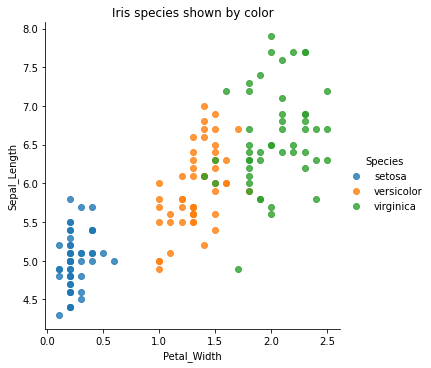

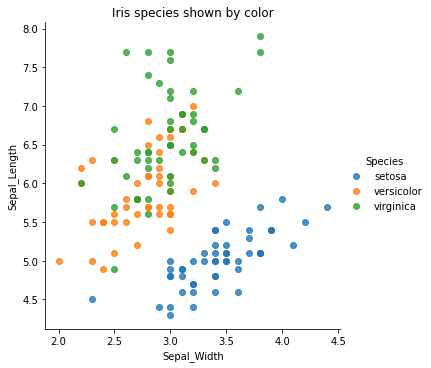

In [5]:
# Let's do some plotting
%matplotlib inline
def plot_iris(iris, col1, col2):
    sns.lmplot(x=col1,
              y=col2, 
              data=iris,
              hue='Species',
              fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Iris species shown by color")
    plt.show()
    
plot_iris(iris.data, 'Petal_Width', 'Sepal_Length')
plot_iris(iris.data, 'Sepal_Width', 'Sepal_Length')


### Prepare the dataset

In [6]:
num_cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

iris_scaled = scale(iris.data[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [7]:
# We'll have to label encode our Species column as scikit learn methods
# expect numerical numpy arrays as arguments
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['Species'] = [levels[x] for x in iris.data['Species']]
iris_scaled.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


- Splitting the data before fitting it into our model 

In [8]:
# Using Bernoulli sampling technique split the data into train and test sets
np.random.seed(3456)
iris_split = train_test_split(np.asmatrix(iris_scaled), test_size=75)
iris_train_features = iris_split[0][:, :4]
iris_train_labels = np.ravel(iris_split[0][:, 4]) # we want a 1d numpy array 
iris_test_features = iris_split[1][:, :4]
iris_test_labels = np.ravel(iris_split[1][:, 4])

print(iris_train_features.shape)
print(iris_train_labels.shape)
print(iris_test_features.shape)
print(iris_test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


### Training and evaluating a KNN model

In [9]:
KNN_mod = KNeighborsClassifier(n_neighbors=3)
KNN_mod.fit(iris_train_features, iris_train_labels)

KNeighborsClassifier(n_neighbors=3)

In [10]:
iris_test = pd.DataFrame(iris_test_features, columns = num_cols)
iris_test['Predicted'] = KNN_mod.predict(iris_test_features)
iris_test['Correct'] = [1 if x == z else 0 for x, z in zip(iris_test['Predicted'], iris_test_labels)]
accuracy = 100.0 * float(sum(iris_test['Correct'])) / float(iris_test.shape[0])
print(f"Accuracy = {accuracy}")

Accuracy = 96.0


- We have a pretty good accuracy
- Let's plot the classification of the iris species

'done!'

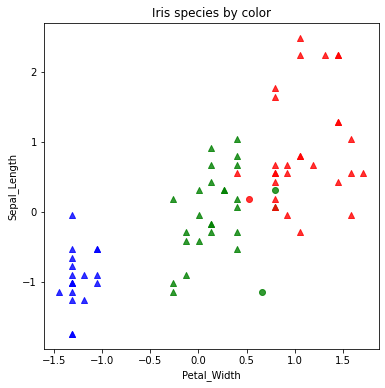

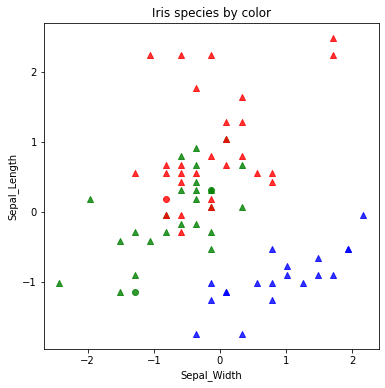

In [11]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris_test['Species'] = [levels[x] for x in iris_test['Predicted']]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
def plot_shapes(df, col1, col2, markers, colors):
    ax = plt.figure(figsize=(6, 6)).gca()  # define plot axis
    for m in markers:
        for c in colors:
            df_temp = df[(df['Correct'] == m) & (df['Species'] == c)]
            sns.regplot(x = col1, y = col2,
                        data = df_temp,
                        fit_reg = False,
                        scatter_kws = {'color':colors[c]},
                        marker = markers[m],
                        ax  = ax
                       )
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Iris species by color")
    return 'done!'

plot_shapes(iris_test, 'Petal_Width', 'Sepal_Length', markers, colors)
plot_shapes(iris_test, 'Sepal_Width', 'Sepal_Length', markers, colors)